# **Trabalho 2 de Inteligência de Negócios (BI) <br>**
**Orientadora:** Kelly A. S. Gazolli <br>
**Alunos:** Jackson W. S. Agostinho e Jardielma Q. De Lima

## **Importa bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix

## **Carrega dataset**


In [ ]:
dataset_heart_pd = pd.read_csv(filepath_or_buffer="https://raw.githubusercontent.com/jacksonwillian/inputdata-trab2/master/heart.csv", delimiter="," )


**Resumo do dataset**

303 linhas registros, 13 colunas atributos(primeiras) e 1 coluna rótulo(última).

De 303 registros de paciente, 138 rótulos 0 (não) e 165 rótulos 1 (sim) para o diagnóstico de ataque cardíaco.



In [ ]:
dataset_heart_pd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Estatística do dataset** [[Ref](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)]

In [ ]:
dataset_heart_pd.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


## **Converte dataset de *DataFrame* para a *NumPy* array** [[Ref](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html)]

Optou-se pela conversão somente porque acreditamos ser mais entendível serapar os atributos e rótulos através dos índices do array.

In [ ]:
dataset_heart_np = dataset_heart_pd.to_numpy()
dataset_heart_np

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

## **Divide dataset em arrays de atributos (X) e rótulos (y)**
A variável `X` recebe os valores dos atributos. Isto `[0:, 0:-1]` indica todas as linhas do array e todas as colunas desconsiderando a última.
<br>
A variável `y` recebe os valores dos rótulos. Isto `[0:,-1]` indica todas as linhas do array e somente a última coluna.


In [ ]:
X = dataset_heart_np[0:, 0:-1]
y = dataset_heart_np[0:,-1]

print("Atributos:\n{}\n\n\nRótulos:\n{}".format(X, y))

Atributos:
[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


Rótulos:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

## **Padronização da escala dos dados** [[Ref](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)]

A `StandardScaler()` permite a transformação de escala dos valores dos dados.
<br>
A função `fit()` recebe dados de entrada e encontra o cálculo da transformação.
<br>
A função `transform()` recebe dados de entrada e aplica a transformação.
<br>
Transforma os valores do dataset para forma com média próxima de zero e um desvio padrão próximo a um.

In [ ]:
scaler = StandardScaler()  
scaler.fit(X)

X = scaler.transform(X)  
print(X)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


## **KFold (k=5) Divisão Dos Dados Treino/Teste**

Cada índice de divisão de dados treino/teste são salvos em uma lista, então essa mesma lista será utilizada por todos os modelos.

In [ ]:
# k = 5
kfold = 5
# instância kfold
skfold = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=42)
# gera os índices kfold
skfold_indexs = skfold.split(X, y)
# lista de índices de treino/teste
list_train_test_skfold = []
for train_index, test_index in skfold_indexs:
  list_train_test_skfold.append( tuple([train_index, test_index]))
 

## **Treinamento e Teste de modelos**

In [ ]:

def matrix_to_str(matrix):
  '''
  Função
  ----
  Transforma a matriz de lista para texto \n

  Parâmetro
  ----
  matrix <- Lista de lista matriz \n

  Retorno
  ----
  str_matrix -> Matriz no formato de string
  ''' 
  # gambiarra: para adicionar os rótulos na matriz de confusão de formato texto
  labels = ["0: não", "1: sim"] # 1= sim; 0 = não
  str_matrix = "{:<4} {:<4}  {:<4}\n".format(0, 1, "<- classified as")
  for i in range (len(matrix)):
    for j in range (len(matrix[0])):
      str_matrix += "{:<4} ".format(matrix[i][j])
    str_matrix += "    {:<4}\n".format(labels[i])
  return str_matrix


def sum_of_matrices(accumulated_matrix, partial_matrix):
  '''
  Função
  ----
  Soma duas matrizes lista de listas \n

  Parâmetro
  ----
  accumulated_matrix <- Lista de lista matriz acumulada \n
  partial_matrix <- Lista de lista matriz parcial \n

  Retorno
  ----
  accumulated_matrix -> Lista de lista matriz acumulada atualizada
  '''   
  if accumulated_matrix == []:
    accumulated_matrix = partial_matrix[:]
  else:
    for i in range ( len(partial_matrix) ):
      for j in range ( len(partial_matrix[0]) ):
        element = accumulated_matrix[i][j] + partial_matrix[i][j]
        accumulated_matrix[i][j] = element
  return accumulated_matrix


def training_and_test(model, X, y, list_train_test_skfold):
  '''
  Função
  ----
  Treina e testa o modelo e gera as matrizes de confusão e as métricas \n

  Parâmetro
  ----
  model <- Instância do modelo \n
  X <- Array de dados atributo \n
  y <- Array de dados rótulo \n
  list_train_test_skfold <- Lista de indices do kfold \n

  Retorno
  ----
  dic_result -> Dicionário com as matrizes de confusão e as métricas
  '''  

  # cria matriz acumulada,lista de acurácia e string das matrizes parciais
  accumulated_matrix = []
  list_accuracy = []
  str_partial_matrices = ""
  n_fold = 0

  # para cada divisão de treino e teste do Kfold
  for train_index, test_index in list_train_test_skfold:
    
    # quantidade de divisão
    n_fold += 1

    # dados treino e teste 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # treinamento
    model.fit(X_train, y_train)

    # teste
    y_pred = model.predict(X_test)

    # cria e converte matriz de confusão
    # labels define a ordem dos elementos de linha e coluna na matriz
    conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1]) 
    partial_matrix = conf_matrix.tolist()
    
    # soma das matrizes acumulada e parcial
    accumulated_matrix = sum_of_matrices(accumulated_matrix ,partial_matrix)

    # calcula acurácia
    numerator = partial_matrix[0][0] + partial_matrix[1][1]
    denominador = partial_matrix[0][0] + partial_matrix[0][1] + partial_matrix[1][0] + partial_matrix[1][1]
    accuracy =  numerator / denominador    
    list_accuracy.append(accuracy)

    # converte matriz para texto e concatena
    str_partial_matrices += matrix_to_str(partial_matrix) + "\n"
    
  # média acurácia
  metric_accuracy = sum( list_accuracy ) / n_fold

  # calcula revocação
  numerator = accumulated_matrix[1][1] 
  denominador = accumulated_matrix[1][0] + accumulated_matrix[1][1]
  metric_recall =  numerator / denominador

  # calcula precisão
  numerator = accumulated_matrix[1][1] 
  denominador = accumulated_matrix[0][1] + accumulated_matrix[1][1]
  metric_precision =  numerator / denominador

  # converte matriz para texto
  str_accumulated_matrix = matrix_to_str(accumulated_matrix)

  dic_result = {"model": model,
                "accumulated_matrix": accumulated_matrix,
                "str_accumulated_matrix": str_accumulated_matrix,
                "str_partial_matrices": str_partial_matrices,
                "accuracy": metric_accuracy, 
                "precision": metric_precision,
                "recall": metric_recall}

  return dic_result


def view_result(dic_result, full=True):
  '''
  Função
  ----
  Mostra os resultados do testes \n

  Parâmetro
  ----
  dic_result <- Dicionário de resultado com a matrizes e métricas \n
  full <- Flag para mostrar o resultado completo \n

  Retorno
  ----
  Nulo
  '''  
  if full:
    print("Matrizes parciais\n")
    print(dic_result["str_partial_matrices"])

  print("Matriz acumulada\n")
  print(dic_result["str_accumulated_matrix"])

  print("\nMétricas\n")
  print("Acurácia: {:.3f}".format(dic_result["accuracy"]))
  print("Revocação: {:.3f}".format(dic_result["recall"]))
  print("Precisão: {:.3f}".format(dic_result["precision"]))

  return None

## **Criação dos modelos e visualização dos resultados**

Define dicionário de métricas utilizado para preencher os dados do gráfico.



In [ ]:
# indice 0 da lista: accuracy
# indice 1 da lista: recall
# indice 2 da lista: precision
dic_metrics = {'knn=3':[0,0,0],
               'knn=5':[0,0,0],
               'knn=7':[0,0,0],
               'knn=9':[0,0,0],
               'svm=linear':[0,0,0],
               'svm=rbf':[0,0,0]}

### **K Nearest Neighbor (KNN)**

**KNN (K=3)**

In [ ]:
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)
list_train_test_skfold
result = training_and_test(knn_model, X, y, list_train_test_skfold)
view_result(result, True)
dic_metrics['knn=3'][0] = result["accuracy"]
dic_metrics['knn=3'][1] = result["recall"]
dic_metrics['knn=3'][2] = result["precision"]

Matrizes parciais

0    1     <- classified as
24   4        0: não
4    29       1: sim

0    1     <- classified as
23   5        0: não
4    29       1: sim

0    1     <- classified as
17   11       0: não
6    27       1: sim

0    1     <- classified as
21   6        0: não
6    27       1: sim

0    1     <- classified as
18   9        0: não
2    31       1: sim


Matriz acumulada

0    1     <- classified as
103  35       0: não
22   143      1: sim


Métricas

Acurácia: 0.812
Revocação: 0.867
Precisão: 0.803


**KNN (K=5)**

In [ ]:
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
result = training_and_test(knn_model, X, y, list_train_test_skfold)    
view_result(result, False)
dic_metrics['knn=5'][0] = result["accuracy"]
dic_metrics['knn=5'][1] = result["recall"]
dic_metrics['knn=5'][2] = result["precision"]

Matriz acumulada

0    1     <- classified as
98   40       0: não
21   144      1: sim


Métricas

Acurácia: 0.798
Revocação: 0.873
Precisão: 0.783


**KNN (K=7)**

In [ ]:
k = 7
knn_model = KNeighborsClassifier(n_neighbors=k)
result = training_and_test(knn_model, X, y, list_train_test_skfold)    
view_result(result, False)
dic_metrics['knn=7'][0] = result["accuracy"]
dic_metrics['knn=7'][1] = result["recall"]
dic_metrics['knn=7'][2] = result["precision"]

Matriz acumulada

0    1     <- classified as
97   41       0: não
18   147      1: sim


Métricas

Acurácia: 0.805
Revocação: 0.891
Precisão: 0.782


**KNN (K=9)**

In [ ]:
k = 9
knn_model = KNeighborsClassifier(n_neighbors=k)
result = training_and_test(knn_model, X, y, list_train_test_skfold)    
view_result(result, False)
dic_metrics['knn=9'][0] = result["accuracy"]
dic_metrics['knn=9'][1] = result["recall"]
dic_metrics['knn=9'][2] = result["precision"]

Matriz acumulada

0    1     <- classified as
98   40       0: não
18   147      1: sim


Métricas

Acurácia: 0.808
Revocação: 0.891
Precisão: 0.786


### **Support Vector Machine (SVM)**

**SVM (Kernel=Linear)**

In [ ]:
svm_model = svm.SVC(kernel='linear')
result = training_and_test(svm_model, X, y, list_train_test_skfold)    
view_result(result, False)
dic_metrics['svm=linear'][0] = result["accuracy"]
dic_metrics['svm=linear'][1] = result["recall"]
dic_metrics['svm=linear'][2] = result["precision"]

Matriz acumulada

0    1     <- classified as
103  35       0: não
13   152      1: sim


Métricas

Acurácia: 0.842
Revocação: 0.921
Precisão: 0.813


**SVM (Kernel=RBF)**

In [ ]:
svm_model = svm.SVC(kernel='rbf')
result = training_and_test(svm_model, X, y, list_train_test_skfold)    
view_result(result, False)
dic_metrics['svm=rbf'][0] = result["accuracy"]
dic_metrics['svm=rbf'][1] = result["recall"]
dic_metrics['svm=rbf'][2] = result["precision"]

Matriz acumulada

0    1     <- classified as
100  38       0: não
18   147      1: sim


Métricas

Acurácia: 0.815
Revocação: 0.891
Precisão: 0.795


# **Gráfico: Comparação das métricas** [[Ref](https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py)]
Parte extra

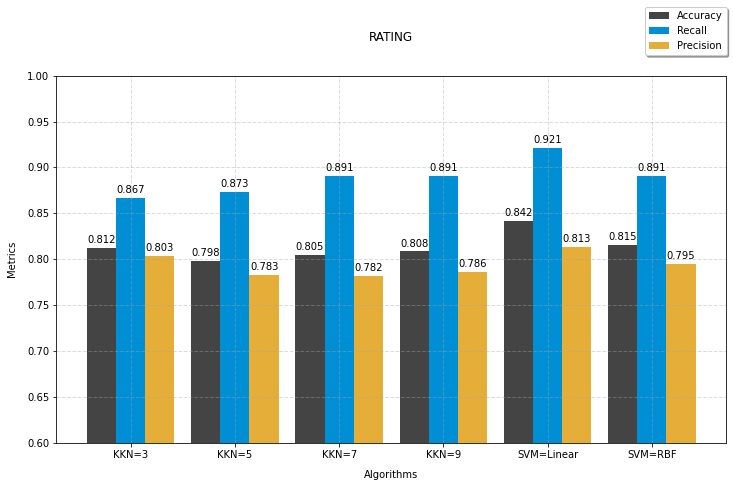

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

# define valores e intervalo do eixo-x
algorithms_x = ["KKN=3", "KKN=5", "KKN=7", "KKN=9", "SVM=Linear", "SVM=RBF"]
x_indexes = np.arange( len(algorithms_x) )

# define valores do eixo-y
accuracy_y = [dic_metrics['knn=3'][0], dic_metrics['knn=5'][0], dic_metrics['knn=7'][0], dic_metrics['knn=9'][0], dic_metrics['svm=linear'][0], dic_metrics['svm=rbf'][0]]
recall_y = [dic_metrics['knn=3'][1],dic_metrics['knn=5'][1], dic_metrics['knn=7'][1], dic_metrics['knn=9'][1], dic_metrics['svm=linear'][1], dic_metrics['svm=rbf'][1]]
precision_y = [dic_metrics['knn=3'][2], dic_metrics['knn=5'][2], dic_metrics['knn=7'][2], dic_metrics['knn=9'][2], dic_metrics['svm=linear'][2], dic_metrics['svm=rbf'][2]]

# define lagura da barra
column_width = 0.28

fig, ax = plt.subplots()

# adiciona as barras
bar1 = ax.bar(x_indexes - column_width, accuracy_y, width=column_width, color="#444444", label="Accuracy")
bar2 = ax.bar(x_indexes, recall_y, width=column_width, color="#008fd5", label="Recall")
bar3 = ax.bar(x_indexes + column_width, precision_y, width=column_width, color="#e5ae38", label="Precision")

# define o intervalo mínimo e máximo eixo-y
plt.ylim(0.6, 1.0)

# ajusta escala
fig.subplots_adjust(top=0.55) 

# define tamanho da figura
#plt.rcParams['figure.figsize'] = (80,80)
plt.gcf().set_size_inches(12, 12)

# define linha de grade
plt.grid(color='0.65', linestyle='--', linewidth=1, alpha=0.4)

# define legendas e titulos
plt.legend(loc='upper center', bbox_to_anchor=(0.94, 1.2), shadow=True, ncol=1) # 1.1, 1.0
plt.xticks(ticks=x_indexes, labels=algorithms_x)
plt.title("RATING", pad=35)
plt.xlabel("Algorithms",labelpad=10)
plt.ylabel("Metrics", labelpad=10)
#ax.xaxis.tick_top()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(round(height,3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
        
# adiciona valores nas barras
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()
